## Represent 2D Pixel on 3D Sphere

In [1]:
import qiskit
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import pi

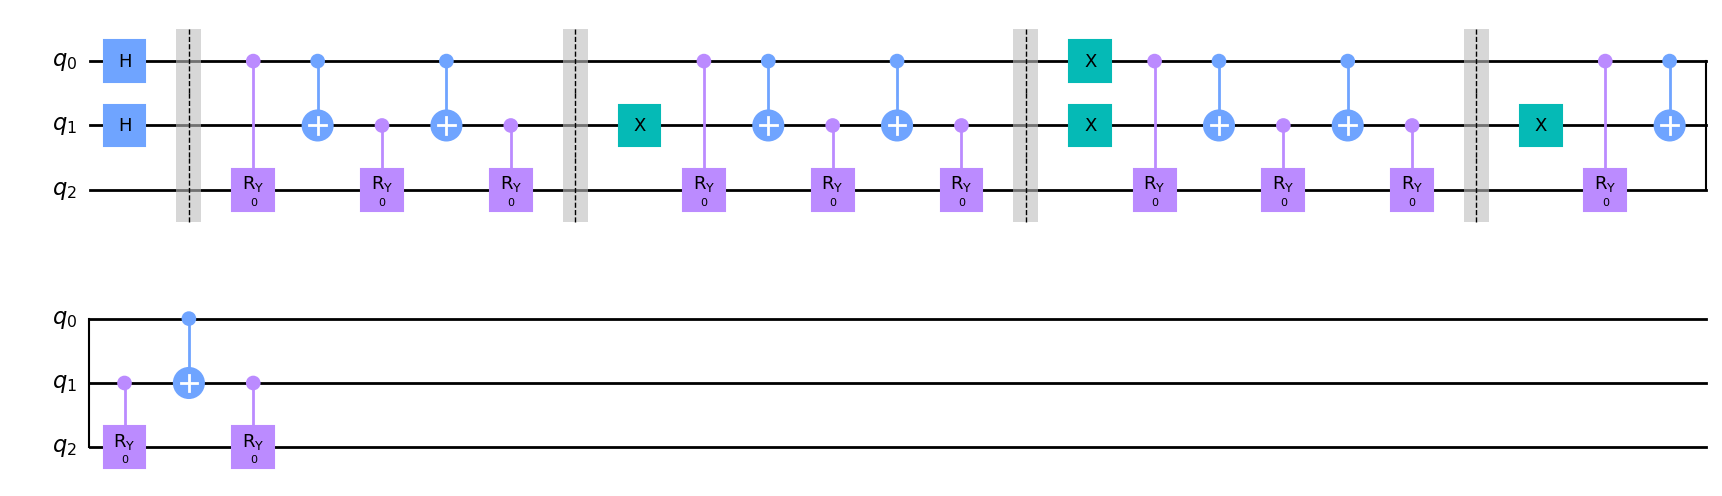

In [16]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)

qc.barrier()

#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

#Pixel 3

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

#Pixel 4

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

# qc.measure_all()

qc.draw('mpl')

{'000': 1068, '011': 1017, '010': 974, '001': 1037}


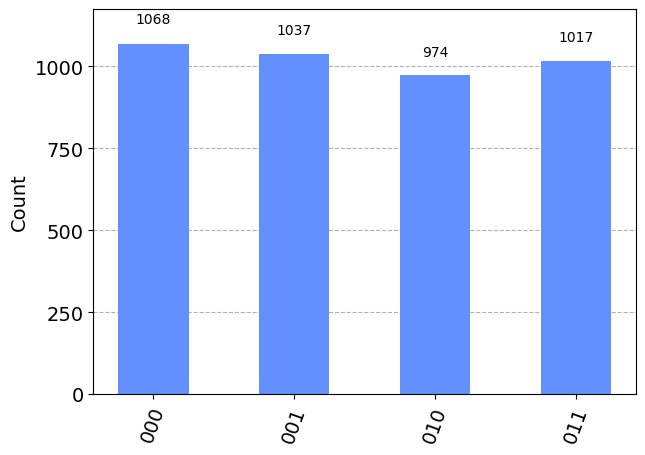

In [14]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j],
            dims=(2, 2, 2))


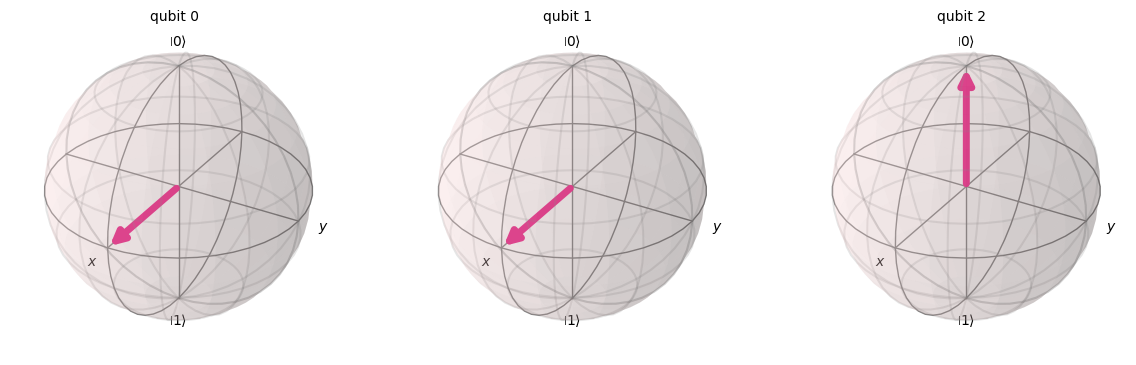

In [112]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

# 2*2 Pixel Projection to 3D bloch sphere

In [21]:
import os 
os.path.abspath('')

'c:\\Users\\admin\\Desktop\\Stereo'

In [35]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math import pi
from PIL import Image

In [36]:
path_img = 'pixel.png'
path_img = os.path.join(os.path.abspath(''),
                            path_img)
print(path_img)

c:\Users\admin\Desktop\Stereo\pixel.png


In [37]:
def projection(pix_proj, r, h_img, w_img, h_proj, w_proj):

    (row, col) = pix_proj

    x = row
    y = col
    z = 0

    Q = np.array([x, y, z], dtype=np.float32)

    P = get_point_on_sphere(Q, r)
    
    return P


def get_point_on_sphere(point,r):

    [x, y, z] = point
    k = 2 * r**2 / (x**2 + y**2 + r**2)

    return np.array([round(k * x, 3), round(k * y, 3), round((k - 1) * r, 3)])

In [38]:
img = np.array(Image.open(path_img))

h_img = img.shape[0]
w_img = img.shape[1]
h_proj = 2
w_proj = 2

proj = np.zeros((h_proj, w_proj, 3), dtype=np.uint8)

r = 1

def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])

In [82]:
point_2d = np.ndarray([])
point_3d = []

for i in np.ndindex(proj.shape[:2]):
    sphere = projection(i, r, h_img, w_img, h_proj, w_proj)
    np.ndarray(i)
    #point_2d.append(np.ndarray(i),axis=0)

    point_3d.append(sphere)
print(type(sphere))
print(type(point_2d))
print('point_2d=',point_2d)
print('point_3d=',point_3d)
print(type(point_3d))
#plot_bloch_vector(np.array(point_2d), title='2D Pixel',figsize=(5,5))
#plot_bloch_vector(point_3d, title='3D projection',figsize=(5,5))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
point_2d= 0.0
point_3d= [array([0., 0., 1.]), array([0., 1., 0.]), array([1., 0., 0.]), array([ 0.667,  0.667, -0.333])]
<class 'list'>


In [ ]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])


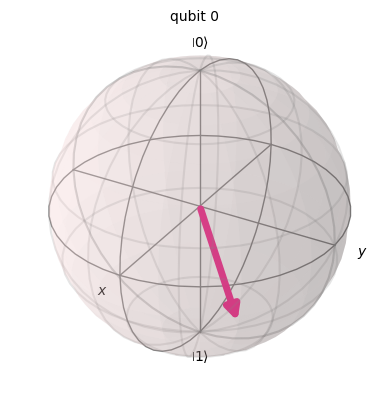

In [13]:
import numpy as np
from math import pi
state = Statevector([1.0+0.j, 1.0+0.j]/np.sqrt(2))  # [|0>, |1>] 의 coefficient

P = np.array([0.667, 0.667, -0.333])

plot_bloch_vector(P)